In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from ISLP.models import ModelSpec as MS


# Notebook to train models and compare them.

The first 2 models features were selected by by running VIF calculations for each feature and then filtering feature lists down to VIF < 10, < 5 and < 1. Features with a VIF less than 1 resulted in no features.

## Model 1 (Features filtered by VIF < 10)

In [2]:
players_df_1 = pd.read_csv('../../data/processed/lr_model1_training_testing_dataset.csv')
players_df_1.dropna(ignore_index=True, inplace=True)

# preparing the training/testing splits
training_df_1 = players_df_1[players_df_1['Season'] != 2024].reset_index(drop=True)
testing_df_1 = players_df_1[players_df_1['Season'] == 2024].reset_index(drop=True)

# preparing the training/testing splits
X_train_1 = training_df_1.drop(columns=['HR', 'Season'])
y_train_1 = training_df_1['HR']

X_test_1 = testing_df_1.drop(columns=['HR', 'Season'])
y_test_1 = testing_df_1['HR']

# adding intercept
X_train_1.insert(0, 'intercept', 1)
X_test_1.insert(0, 'intercept', 1)

sm_model_1 = sm.OLS(y_train_1, X_train_1).fit()
sm_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HR   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     685.0
Date:                Mon, 14 Apr 2025   Prob (F-statistic):               0.00
Time:                        16:14:17   Log-Likelihood:                -20543.
No. Observations:                6826   AIC:                         4.114e+04
Df Residuals:                    6799   BIC:                         4.132e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          -5.5711      2.115     -2.634      0.008      -9.717      -1.425
season_factor       2.2822      0.398      5.740      0.000       1.503       3.062
tmFactor            7.3054      0.461     15.839      0.000       6.401       8.210
Age                 0.0551      0.828      0.067      0.947      -1.569       1.679
3B                  0.4678      0.052      8.938      0.000       0.365       0.570
IBB                 1.0766      0.032     33.347      0.000       1.013       1.140
GDP                 0.5978      0.018     32.473      0.000       0.562       0.634
IFH                 0.3557      0.019     18.670      0.000       0.318       0.393
BUH                -0.3563      0.058     -6.103      0.000      -0.471      -0.242
K%                  1.9172      0.765      2.505      0.012       0.417       3.418
BB/K                0.0916      0.283      0.324      0.746      -0.462       0.646
BABIP              -1.8392      0.511     -3.601      0.000      -2.840      -0.838
GB/FB              -0.1107      0.042     -2.642      0.008      -0.193      -0.029
IFFB%               0.6215      0.558      1.114      0.265      -0.472       1.715
HR/FB              11.3864      0.792     14.370      0.000       9.833      12.940
IFH%               -1.7966      0.791     -2.271      0.023      -3.347      -0.246
BUH%                1.7565      0.284      6.195      0.000       1.201       2.312
Spd                -0.1978      0.038     -5.168      0.000      -0.273      -0.123
EV                  0.0014      0.021      0.067      0.947      -0.039       0.042
LA                  0.0406      0.007      5.722      0.000       0.027       0.055
Barrel%            32.2869      1.696     19.037      0.000      28.962      35.612
maxEV               0.0373      0.014      2.716      0.007       0.010       0.064
HardHit%           -0.0346      0.651     -0.053      0.958      -1.310       1.241
O-Contact% (pi)    -0.4014      0.392     -1.023      0.306      -1.171       0.368
Z-Contact% (pi)    -1.7957      0.775     -2.316      0.021      -3.316      -0.276
Zone% (pi)         -4.9659      1.142     -4.348      0.000      -7.205      -2.727
Pace (pi)          -0.0992      0.029     -3.429      0.001      -0.156      -0.042
==============================================================================
Omnibus:                     1075.242   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9598.681
Skew:                           0.482   Prob(JB):                         0.00
Kurtosis:                       8.729   Cond. No.                     5.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly 

There are still some high P values, aven with viltering down features by VIF < 10. Also noted at the bottom of summary, condition number is large indicating strong multicollinearity, which makes sense as we are including features that still had VIF values between 5 and 10 with can be problematic.

In [9]:
# getting predictions from test data.
pred_results_1 = sm_model_1.get_prediction(X_test_1)

# creating dataframe of results summary from the predictions and adding in actual homeruns
pred_summary_1 = pred_results_1.summary_frame(alpha=0.05)
pred_summary_1.insert(0, 'HR_actual', y_test_1.values)
# adding Home run error 
pred_summary_1.insert(1, 'HR_error', pred_summary_1['HR_actual'] - pred_summary_1['mean'])

pred_summary_1

,HR_actual,HR_error,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,1,-2.437439,3.437439,0.182130,3.080407,3.794471,-6.206708,13.081585
1,58,5.135658,52.864342,0.633557,51.622372,54.106312,43.147111,62.581573
2,2,-1.673944,3.673944,0.171755,3.337252,4.010637,-5.969471,13.317359
3,6,-2.266625,8.266625,0.199407,7.875724,8.657525,-1.378835,17.912085
4,0,-2.152840,2.152840,0.236404,1.689414,2.616267,-7.495831,11.801511
...,...,...,...,...,...,...,...,...
637,4,-1.291186,5.291186,0.287722,4.727161,5.855212,-4.362840,14.945212
638,23,6.843215,16.156785,0.234445,15.697201,16.616370,6.508298,25.805273
639,0,0.344720,-0.344720,0.250866,-0.836496,0.147056,-9.994795,9.305354
640,17,4.853758,12.146242,0.201655,11.750935,12.541548,2.500602,21.791881


## Model 2

Feature list filtered down to features with VIF < 5.

In [11]:
players_df_2 = pd.read_csv('../../data/processed/lr_model2_training_testing_dataset.csv')
players_df_2.dropna(ignore_index=True, inplace=True)

# preparing the training/testing splits
training_df_2 = players_df_2[players_df_2['Season'] != 2024].reset_index(drop=True)
testing_df_2 = players_df_2[players_df_2['Season'] == 2024].reset_index(drop=True)

# preparing the training/testing splits
X_train_2 = training_df_2.drop(columns=['HR', 'Season'])
y_train_2 = training_df_2['HR']

X_test_2 = testing_df_2.drop(columns=['HR', 'Season'])
y_test_2 = testing_df_2['HR']

X_train_2.insert(0, 'intercept', 1)
X_test_2.insert(0, 'intercept', 1)

sm_model_2 = sm.OLS(y_train_2, X_train_2).fit()
sm_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HR   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     897.0
Date:                Mon, 14 Apr 2025   Prob (F-statistic):               0.00
Time:                        16:45:16   Log-Likelihood:                -21778.
No. Observations:                7139   AIC:                         4.359e+04
Df Residuals:                    7120   BIC:                         4.373e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept        -8.6445      1.677     -5.155      0.000     -11.932      -5.357
season_factor     2.2153      0.405      5.467      0.000       1.421       3.010
tmFactor          7.1845      0.468     15.347      0.000       6.267       8.102
Age              -0.7877      0.840     -0.937      0.349      -2.435       0.860
3B                0.7713      0.051     14.996      0.000       0.670       0.872
IBB               1.1434      0.033     34.874      0.000       1.079       1.208
GDP               0.7524      0.016     47.409      0.000       0.721       0.783
BUH              -0.2433      0.060     -4.082      0.000      -0.360      -0.126
GB/FB            -0.3689      0.037     -9.941      0.000      -0.442      -0.296
IFFB%             1.1042      0.528      2.093      0.036       0.070       2.138
HR/FB            20.1386      0.672     29.975      0.000      18.822      21.456
IFH%              1.3177      0.719      1.833      0.067      -0.092       2.727
BUH%              1.3996      0.294      4.764      0.000       0.824       1.976
Spd              -0.1685      0.039     -4.318      0.000      -0.245      -0.092
EV               -0.0199      0.019     -1.063      0.288      -0.057       0.017
maxEV             0.0817      0.012      6.667      0.000       0.058       0.106
HardHit%          2.0731      0.559      3.706      0.000       0.976       3.170
Zone% (pi)       -2.9971      0.860     -3.486      0.000      -4.682      -1.312
Pace (pi)        -0.1292      0.027     -4.839      0.000      -0.182      -0.077
==============================================================================
Omnibus:                     1406.534   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8174.179
Skew:                           0.818   Prob(JB):                         0.00
Kurtosis:                       7.980   Cond. No.                     4.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
# getting predictions from test data.
pred_results_2 = sm_model_2.get_prediction(X_test_2)

# creating dataframe of results summary from the predictions and adding in actual homeruns
pred_summary_2 = pred_results_2.summary_frame(alpha=0.05)
pred_summary_2.insert(0, 'HR_actual', y_test_2.values)
# adding Home run error 
pred_summary_2.insert(1, 'HR_error', pred_summary_2['HR_actual'] - pred_summary_2['mean'])

pred_summary_2

,HR_actual,HR_error,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,1,-2.319476,3.319476,0.173537,2.979293,3.659660,-6.721530,13.360483
1,58,7.224567,50.775433,0.618751,49.562497,51.988368,40.667154,60.883712
2,2,-2.040904,4.040904,0.155120,3.736824,4.344985,-5.998944,14.080753
3,6,-1.931084,7.931084,0.170158,7.597525,8.264644,-2.109700,17.971869
4,0,-1.226782,1.226782,0.177841,0.878160,1.575403,-8.814515,11.268078
...,...,...,...,...,...,...,...,...
640,4,-2.892394,6.892394,0.268290,6.366466,7.418322,-3.156620,16.941409
641,23,6.775416,16.224584,0.230941,15.771871,16.677296,6.179135,26.270032
642,0,-0.147998,0.147998,0.226278,-0.295575,0.591571,-9.897043,10.193039
643,17,6.006882,10.993118,0.185763,10.628968,11.357269,0.951271,21.034966


## model 3 

This is the start of models where the possible features were chosen by looking at scatter plots of each feature compared to homeruns. Then VIF values were run and and features were selected to be removed one at a time. Each time a feature was removed, the VIF values were recalculated and feature removal was performed again. Additionaly, some added feature engineering was done for the remaining models to include a combination of RBIs and games played.



In [16]:
players_df_3 = pd.read_csv('../../data/processed/lr_model_manual_feature_training_testing_dataset.csv')
players_df_3.dropna(ignore_index=True, inplace=True)

# preparing the training/testing splits
training_df_3 = players_df_3[players_df_3['Season'] != 2024].reset_index(drop=True)
testing_df_3 = players_df_3[players_df_3['Season'] == 2024].reset_index(drop=True)

# preparing the training/testing splits
X_train_3 = training_df_3.drop(columns=['HR', 'Season'])
y_train_3 = training_df_3['HR']

X_test_3 = testing_df_3.drop(columns=['HR', 'Season'])
y_test_3 = testing_df_3['HR']

X_train_3.insert(0, 'intercept', 1)
X_test_3.insert(0, 'intercept', 1)
sm_model_3 = sm.OLS(y_train_3, X_train_3).fit()
sm_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HR   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     5312.
Date:                Mon, 14 Apr 2025   Prob (F-statistic):               0.00
Time:                        16:59:03   Log-Likelihood:                -20724.
No. Observations:                7404   AIC:                         4.146e+04
Df Residuals:                    7397   BIC:                         4.151e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.4489      0.108    -22.634      0.000      -2.661      -2.237
G              0.0092      0.002      3.848      0.000       0.005       0.014
RBI/G          8.6854      0.312     27.797      0.000       8.073       9.298
BB             0.1375      0.005     30.072      0.000       0.129       0.146
SO             0.0730      0.003     27.175      0.000       0.068       0.078
Barrel%       16.0521      1.093     14.685      0.000      13.909      18.195
HardHit%      -1.6095      0.314     -5.122      0.000      -2.225      -0.994
==============================================================================
Omnibus:                     1274.311   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6353.478
Skew:                           0.744   Prob(JB):                         0.00
Kurtosis:                       7.287   Cond. No.                     2.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
# getting predictions from test data.
pred_results_3 = sm_model_3.get_prediction(X_test_3)

# creating dataframe of results summary from the predictions and adding in actual homeruns
pred_summary_3 = pred_results_3.summary_frame(alpha=0.05)
pred_summary_3.insert(0, 'HR_actual', y_test_3.values)
# adding Home run error 
pred_summary_3.insert(1, 'HR_error', pred_summary_3['HR_actual'] - pred_summary_3['mean'])

pred_summary_3

,HR_actual,HR_error,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,1,-2.008615,3.008615,0.075824,2.859978,3.157252,-4.789455,10.806684
1,58,16.987266,41.012734,0.362526,40.302080,41.723387,33.183761,48.841707
2,2,-0.533915,2.533915,0.060664,2.414997,2.652833,-5.263644,10.331475
3,6,-2.315708,8.315708,0.066982,8.184404,8.447011,0.517949,16.113466
4,0,1.174198,-1.174198,0.097546,-1.365416,-0.982981,-8.973196,6.624799
...,...,...,...,...,...,...,...,...
642,4,-4.835737,8.835737,0.105016,8.629876,9.041597,1.036367,16.635107
643,23,3.411699,19.588301,0.129158,19.335114,19.841488,11.787538,27.389064
644,0,0.115582,-0.115582,0.076892,-0.266312,0.035149,-7.913691,7.682528
645,17,-4.666014,21.666014,0.245658,21.184454,22.147574,13.854504,29.477524


## Model 4



In [18]:
players_df_4 = pd.read_csv('../../data/processed/lr_model_manual_feature2_training_testing_dataset.csv')
players_df_4.dropna(ignore_index=True, inplace=True)

# preparing the training/testing splits
training_df_4 = players_df_4[players_df_4['Season'] != 2024].reset_index(drop=True)
testing_df_4 = players_df_4[players_df_4['Season'] == 2024].reset_index(drop=True)

# preparing the training/testing splits
X_train_4 = training_df_4.drop(columns=['HR', 'Season'])
y_train_4 = training_df_4['HR']

X_test_4 = testing_df_4.drop(columns=['HR', 'Season'])
y_test_4 = testing_df_4['HR']

X_train_4.insert(0, 'intercept', 1)
X_test_4.insert(0, 'intercept', 1)
sm_model_4 = sm.OLS(y_train_4, X_train_4).fit()
sm_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HR   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     5383.
Date:                Mon, 14 Apr 2025   Prob (F-statistic):               0.00
Time:                        18:49:41   Log-Likelihood:                -20684.
No. Observations:                7404   AIC:                         4.138e+04
Df Residuals:                    7397   BIC:                         4.143e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept        -4.7133      0.270    -17.484      0.000      -5.242      -4.185
season_factor     2.9636      0.304      9.759      0.000       2.368       3.559
RBI/G             9.2730      0.315     29.411      0.000       8.655       9.891
BB                0.1432      0.004     34.057      0.000       0.135       0.151
SO                0.0767      0.002     37.071      0.000       0.073       0.081
Barrel%          15.5101      1.055     14.706      0.000      13.443      17.577
HardHit%         -1.4940      0.313     -4.776      0.000      -2.107      -0.881
==============================================================================
Omnibus:                     1248.718   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6346.804
Skew:                           0.721   Prob(JB):                         0.00
Kurtosis:                       7.300   Cond. No.                     1.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
# getting predictions from test data.
pred_results_4 = sm_model_4.get_prediction(X_test_4)

# creating dataframe of results summary from the predictions and adding in actual homeruns
pred_summary_4 = pred_results_4.summary_frame(alpha=0.05)
pred_summary_4.insert(0, 'HR_actual', y_test_4.values)
# adding Home run error 
pred_summary_4.insert(1, 'HR_error', pred_summary_4['HR_actual'] - pred_summary_4['mean'])

pred_summary_4

,HR_actual,HR_error,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,1,-2.256042,3.256042,0.061555,3.135376,3.376708,-4.499593,11.011677
1,58,16.461817,41.538183,0.333611,40.884210,42.192157,33.755960,49.320406
2,2,-0.551194,2.551194,0.059979,2.433618,2.668771,-5.204393,10.306782
3,6,-2.091252,8.091252,0.053520,7.986338,8.196165,0.335846,15.846658
4,0,1.118824,-1.118824,0.095120,-1.305286,-0.932363,-8.875762,6.638113
...,...,...,...,...,...,...,...,...
642,4,-4.395632,8.395632,0.068897,8.260574,8.530689,0.639760,16.151504
643,23,3.678833,19.321167,0.126770,19.072662,19.569672,11.562490,27.079844
644,0,0.016599,-0.016599,0.070567,-0.154932,0.121733,-7.772529,7.739331
645,17,-4.640740,21.640740,0.229995,21.189885,22.091596,13.872949,29.408532


## Model 5

In [20]:
players_df_5 = pd.read_csv('../../data/processed/lr_model_manual_feature3_training_testing_dataset.csv')
players_df_5.dropna(ignore_index=True, inplace=True)

# preparing the training/testing splits
training_df_5 = players_df_5[players_df_5['Season'] != 2024].reset_index(drop=True)
testing_df_5 = players_df_5[players_df_5['Season'] == 2024].reset_index(drop=True)

# preparing the training/testing splits
X_train_5 = training_df_5.drop(columns=['HR', 'Season'])
y_train_5 = training_df_5['HR']

X_test_5 = testing_df_5.drop(columns=['HR', 'Season'])
y_test_5 = testing_df_5['HR']

X_train_5.insert(0, 'intercept', 1)
X_test_5.insert(0, 'intercept', 1)
sm_model_5 = sm.OLS(y_train_5, X_train_5).fit()
sm_model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HR   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     5217.
Date:                Mon, 14 Apr 2025   Prob (F-statistic):               0.00
Time:                        18:54:16   Log-Likelihood:                -21315.
No. Observations:                7404   AIC:                         4.264e+04
Df Residuals:                    7398   BIC:                         4.268e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept        -5.6029      0.292    -19.164      0.000      -6.176      -5.030
season_factor     4.5861      0.327     14.015      0.000       3.945       5.228
RBI/G            11.9911      0.334     35.913      0.000      11.337      12.646
BB                0.2575      0.003     82.774      0.000       0.251       0.264
Barrel%          19.8725      1.141     17.414      0.000      17.635      22.110
HardHit%         -0.9608      0.340     -2.824      0.005      -1.628      -0.294
==============================================================================
Omnibus:                     1207.549   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7625.382
Skew:                           0.628   Prob(JB):                         0.00
Kurtosis:                       7.810   Cond. No.                         637.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# getting predictions from test data.
pred_results_5 = sm_model_5.get_prediction(X_test_5)

# creating dataframe of results summary from the predictions and adding in actual homeruns
pred_summary_5 = pred_results_5.summary_frame(alpha=0.05)
pred_summary_5.insert(0, 'HR_actual', y_test_5.values)
# adding Home run error 
pred_summary_5.insert(1, 'HR_error', pred_summary_5['HR_actual'] - pred_summary_5['mean'])

pred_summary_5

,HR_actual,HR_error,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,1,-2.793395,3.793395,0.065140,3.665701,3.921089,-4.651379,12.238169
1,58,9.985839,48.014161,0.309474,47.407504,48.620818,39.548588,56.479735
2,2,0.088768,1.911232,0.062546,1.788625,2.033839,-6.533467,10.355931
3,6,-1.134154,7.134154,0.051046,7.034088,7.234220,-1.310248,15.578555
4,0,0.582445,-0.582445,0.102367,-0.783114,-0.381776,-9.028638,7.863748
...,...,...,...,...,...,...,...,...
642,4,-3.155439,7.155439,0.065581,7.026880,7.283997,-1.289348,15.600226
643,23,7.623833,15.376167,0.075012,15.229122,15.523211,6.931078,23.821256
644,0,-0.722371,0.722371,0.073709,0.577881,0.866862,-7.722674,9.167416
645,17,3.472316,13.527684,0.077004,13.376733,13.678634,5.082526,21.972842


In [27]:
def plot_model_predictions(summary_df, model_num):
    plt.figure(figsize=(10, 5))
    
    # Actual vs Predicted
    plt.subplot(1, 2, 1)
    plt.scatter(summary_df['HR_actual'], summary_df['mean'], alpha=0.7)
    plt.plot([summary_df['HR_actual'].min(), summary_df['HR_actual'].max()],
             [summary_df['HR_actual'].min(), summary_df['HR_actual'].max()],
             color='red', linestyle='--')
    plt.title(f'Model {model_num}: Actual vs Predicted HR')
    plt.xlabel('Actual HR')
    plt.ylabel('Predicted HR')
    
    # Residuals
    plt.subplot(1, 2, 2)
    plt.hist(summary_df['HR_error'], bins=15, color='orange', edgecolor='black')
    plt.title(f'Model {model_num}: Residual Distribution')
    plt.xlabel('Prediction Error (Actual - Predicted)')
    plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()


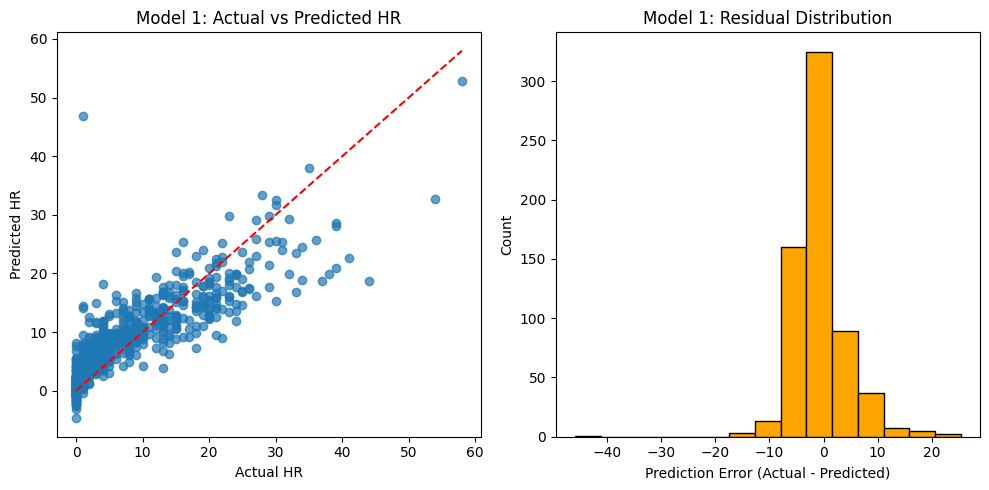

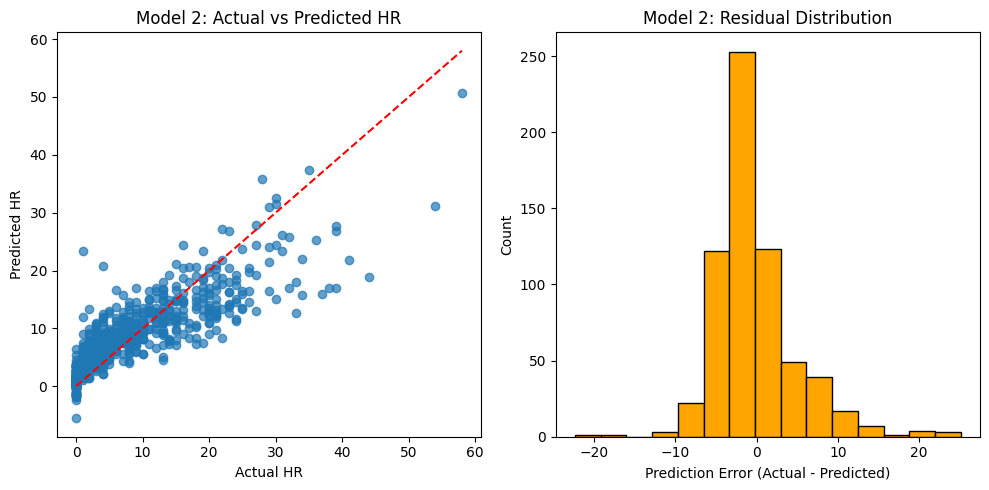

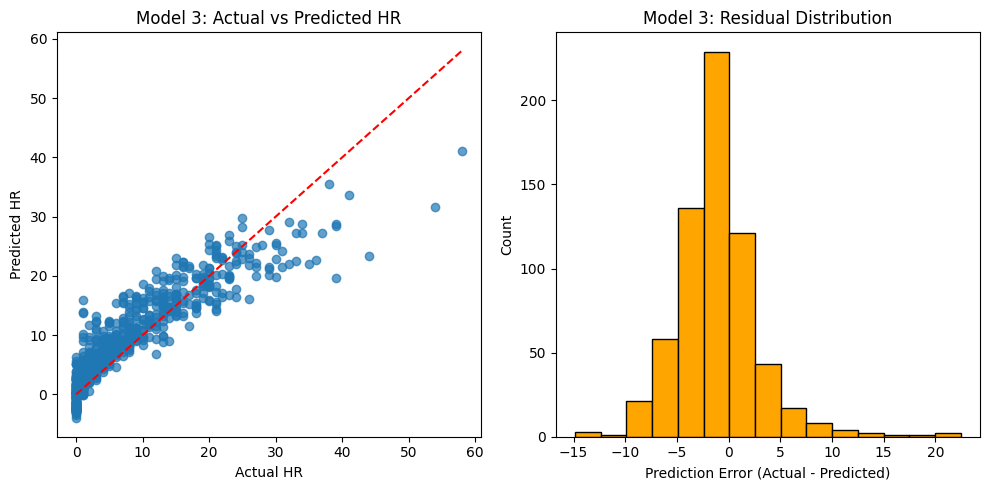

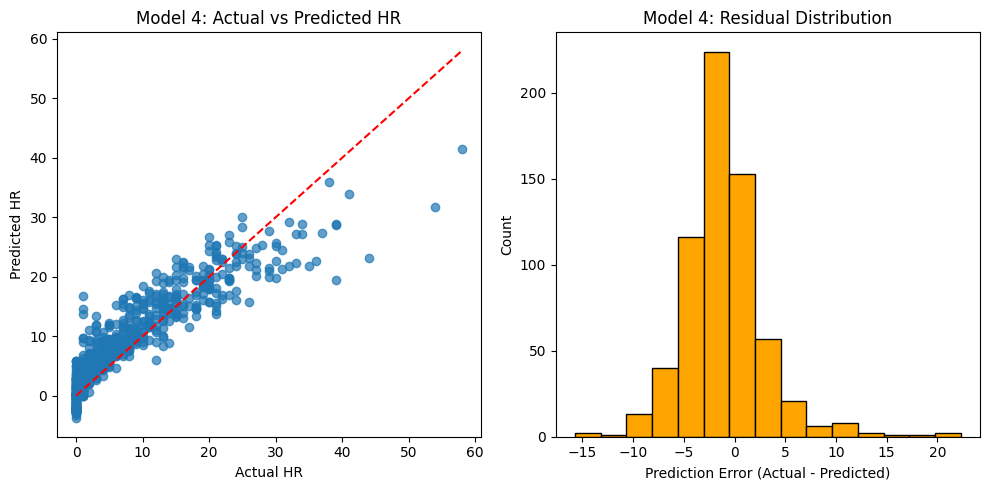

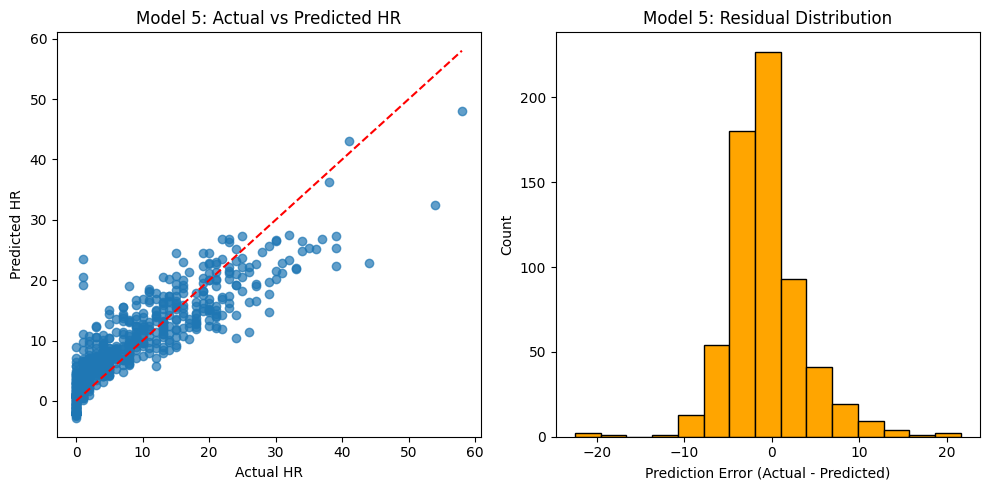

In [28]:
plot_model_predictions(pred_summary_1, 1)
plot_model_predictions(pred_summary_2, 2)
plot_model_predictions(pred_summary_3, 3)
plot_model_predictions(pred_summary_4, 4)
plot_model_predictions(pred_summary_5, 5)


In [41]:
anova_lm(sm_model_3, sm_model_4, sm_model_5)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,7397.0,117012.884765,0.0,NaN,NaN,NaN
1,7397.0,115756.902557,-0.0,1255.982208,-inf,NaN
2,7398.0,137262.777009,-1.0,-21505.874452,1159.093985,NaN


In [42]:
anova_lm(sm_model_3, sm_model_5, sm_model_4)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,7397.0,117012.884765,0.0,NaN,NaN,NaN
1,7398.0,137262.777009,-1.0,-20249.892244,1293.991543,NaN
2,7397.0,115756.902557,1.0,21505.874452,1374.250259,4.558472e-276


In [43]:
anova_lm(sm_model_4, sm_model_3, sm_model_5)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,7397.0,115756.902557,0.0,NaN,NaN,NaN
1,7397.0,117012.884765,-0.0,-1255.982208,inf,NaN
2,7398.0,137262.777009,-1.0,-20249.892244,1091.400787,NaN


In [44]:
anova_lm(sm_model_4, sm_model_5, sm_model_3)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,7397.0,115756.902557,0.0,NaN,NaN,NaN
1,7398.0,137262.777009,-1.0,-21505.874452,1359.499457,NaN
2,7397.0,117012.884765,1.0,20249.892244,1280.102215,1.013800e-258


In [45]:
anova_lm(sm_model_5, sm_model_3, sm_model_4)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,7398.0,137262.777009,0.0,NaN,NaN,NaN
1,7397.0,117012.884765,1.0,20249.892244,1293.991543,2.722265e-261
2,7397.0,115756.902557,-0.0,1255.982208,-inf,NaN


In [46]:
anova_lm(sm_model_5, sm_model_4, sm_model_3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,7398.0,137262.777009,0.0,NaN,NaN,NaN
1,7397.0,115756.902557,1.0,21505.874452,1359.499457,2.313733e-273
2,7397.0,117012.884765,-0.0,-1255.982208,inf,NaN
